# Analisis de Productividad Comercial

## Dashboard

Puedes observar el dashboar en Power BI a través del siguiente archivo [Análisis de productividad comercial](./Analisis%20de%20productividad%20comercial.pbix)


<img src='https://res.cloudinary.com/dzc8agefr/image/upload/v1691860198/5_ajw7vx.png' alt='Dashboard'>


### Importar librerias

In [317]:
%pip install openpyxl

In [318]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl # manipulación archivos .xls, .xlsx
import calendar
import locale


## Configurar idio a español

In [319]:
# Configurar el idioma en español
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')  
# Cambiar 'es_ES.utf8' por la configuración regional adecuada en tu sistema

'es_ES.utf8'

## Establecer apariencia gráficos

In [320]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (8, 10)

## Cargar datos

In [321]:
xlsx = pd.ExcelFile('./Dataset/data_prueba_cpa_v1 - copia.xlsx')
print(xlsx.sheet_names)
df = xlsx.parse('data_prueba_cpa')
df.head()

['data_prueba_cpa', 'glosario']


,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0033_ventas_0_a_100,0043_%_Ventas_leads_cero_a_cien,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,69.6%,37.7%,52.7%,26.0,0.47,...,15.0,27.3%,4.0,10.0,57.0,69.0,35.0,50.7%,0.0,3.3
1,202112,DG1,A16,79.0,43.0,54.4%,24.4%,55.8%,19.0,0.44,...,11.0,25.6%,1.0,73.0,35.0,78.0,21.0,26.9%,2.0,3.7
2,202112,DG1,A18,20.0,24.0,120.0%,15.4%,79.2%,14.0,0.58,...,8.0,33.3%,0.0,50.0,64.0,91.0,44.0,48.4%,2.0,4.3
3,202112,DG1,A19,79.0,51.0,64.6%,44.9%,49.0%,22.0,0.43,...,13.0,25.5%,7.0,19.0,29.0,49.0,16.0,32.7%,0.0,2.3
4,202112,DG1,A20,13.0,22.0,169.2%,15.4%,54.5%,8.0,0.36,...,2.0,9.1%,5.0,8.0,53.0,52.0,38.0,73.1%,0.0,2.5


## Colecta y validación de datos

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año_mes                           946 non-null    int64  
 1   Celula                            946 non-null    object 
 2   Asesor                            946 non-null    object 
 3   0021_meta                         904 non-null    float64
 4   0022_ventas                       904 non-null    float64
 5   0023_cumplimiento                 904 non-null    object 
 6   0045_%_Efectividad_SQL            938 non-null    object 
 7   0044_%_Ventas_mercadeo            938 non-null    object 
 8   0031_ventas_mismo_mes             938 non-null    float64
 9   0041_%_Ventas_leads_mes           938 non-null    float64
 10  0032_ventas_mes_anterior          938 non-null    float64
 11  0042_%_Ventas_leads_mes_anterior  938 non-null    float64
 12  0033_ven

## Transformar columnas tipo object a float

Tenemos una excepción de las columnas Celula y Asesor

In [323]:
for col in df.columns[3:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str[:-1].astype(float)

df.head()

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0033_ventas_0_a_100,0043_%_Ventas_leads_cero_a_cien,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,69.6,37.7,52.7,26.0,0.47,...,15.0,27.3,4.0,10.0,57.0,69.0,35.0,50.7,0.0,3.3
1,202112,DG1,A16,79.0,43.0,54.4,24.4,55.8,19.0,0.44,...,11.0,25.6,1.0,73.0,35.0,78.0,21.0,26.9,2.0,3.7
2,202112,DG1,A18,20.0,24.0,120.0,15.4,79.2,14.0,0.58,...,8.0,33.3,0.0,50.0,64.0,91.0,44.0,48.4,2.0,4.3
3,202112,DG1,A19,79.0,51.0,64.6,44.9,49.0,22.0,0.43,...,13.0,25.5,7.0,19.0,29.0,49.0,16.0,32.7,0.0,2.3
4,202112,DG1,A20,13.0,22.0,169.2,15.4,54.5,8.0,0.36,...,2.0,9.1,5.0,8.0,53.0,52.0,38.0,73.1,0.0,2.5


In [324]:
df.dtypes

Año_mes                               int64
Celula                               object
Asesor                               object
0021_meta                           float64
0022_ventas                         float64
0023_cumplimiento                   float64
0045_%_Efectividad_SQL              float64
0044_%_Ventas_mercadeo              float64
0031_ventas_mismo_mes               float64
0041_%_Ventas_leads_mes             float64
0032_ventas_mes_anterior            float64
0042_%_Ventas_leads_mes_anterior    float64
0033_ventas_0_a_100                 float64
0043_%_Ventas_leads_cero_a_cien     float64
0024_seg_atrasados                  float64
0025_seg_abiertos                   float64
0026_descartes_totales              float64
0027_seg_creados_mismo_mes          float64
0028_descartes_mismo_mes            float64
0029_%_descarte_mismo_mes           float64
00291_descartes_dia                 float64
00292_avg_seg_creados_dia           float64
dtype: object

como la columna 0023_cumplimiento es un porcentaje vamos a renombrar el titulo para que sea más entendible

In [325]:
nuevo_nombre = '0023_%_cumplimiento'
col_cambio_nombre = '0023_cumplimiento'
df.rename(columns={col_cambio_nombre: nuevo_nombre}, inplace=True)

df.head()

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0033_ventas_0_a_100,0043_%_Ventas_leads_cero_a_cien,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,69.6,37.7,52.7,26.0,0.47,...,15.0,27.3,4.0,10.0,57.0,69.0,35.0,50.7,0.0,3.3
1,202112,DG1,A16,79.0,43.0,54.4,24.4,55.8,19.0,0.44,...,11.0,25.6,1.0,73.0,35.0,78.0,21.0,26.9,2.0,3.7
2,202112,DG1,A18,20.0,24.0,120.0,15.4,79.2,14.0,0.58,...,8.0,33.3,0.0,50.0,64.0,91.0,44.0,48.4,2.0,4.3
3,202112,DG1,A19,79.0,51.0,64.6,44.9,49.0,22.0,0.43,...,13.0,25.5,7.0,19.0,29.0,49.0,16.0,32.7,0.0,2.3
4,202112,DG1,A20,13.0,22.0,169.2,15.4,54.5,8.0,0.36,...,2.0,9.1,5.0,8.0,53.0,52.0,38.0,73.1,0.0,2.5


La columna Asesor contiene un espacio (' ') al final del nombre por lo tanto vamos a renombrar la columna

In [326]:
nuevo_nombre = 'Asesor'
col_cambio_nombre = 'Asesor '
df.rename(columns={col_cambio_nombre: nuevo_nombre}, inplace=True)

df.head()

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0033_ventas_0_a_100,0043_%_Ventas_leads_cero_a_cien,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,69.6,37.7,52.7,26.0,0.47,...,15.0,27.3,4.0,10.0,57.0,69.0,35.0,50.7,0.0,3.3
1,202112,DG1,A16,79.0,43.0,54.4,24.4,55.8,19.0,0.44,...,11.0,25.6,1.0,73.0,35.0,78.0,21.0,26.9,2.0,3.7
2,202112,DG1,A18,20.0,24.0,120.0,15.4,79.2,14.0,0.58,...,8.0,33.3,0.0,50.0,64.0,91.0,44.0,48.4,2.0,4.3
3,202112,DG1,A19,79.0,51.0,64.6,44.9,49.0,22.0,0.43,...,13.0,25.5,7.0,19.0,29.0,49.0,16.0,32.7,0.0,2.3
4,202112,DG1,A20,13.0,22.0,169.2,15.4,54.5,8.0,0.36,...,2.0,9.1,5.0,8.0,53.0,52.0,38.0,73.1,0.0,2.5


## Crear nueva columna con nombre de mes

In [327]:
df['nombre_mes'] = df['Año_mes'].apply(lambda x: x % 100).apply(lambda x: calendar.month_name[x])
df['nombre_mes'].head()

0    diciembre
1    diciembre
2    diciembre
3    diciembre
4    diciembre
Name: nombre_mes, dtype: object

## Crear columna numero mes

In [328]:
df['numero_mes'] = df['Año_mes'].apply(lambda x: x % 100)
df['numero_mes'].head(2)

0    12
1    12
Name: numero_mes, dtype: int64

## ¿Existen valores nulos?

In [329]:
df.isnull().sum()

Año_mes                              0
Celula                               0
Asesor                               0
0021_meta                           42
0022_ventas                         42
0023_%_cumplimiento                 42
0045_%_Efectividad_SQL               8
0044_%_Ventas_mercadeo               8
0031_ventas_mismo_mes                8
0041_%_Ventas_leads_mes              8
0032_ventas_mes_anterior             8
0042_%_Ventas_leads_mes_anterior     8
0033_ventas_0_a_100                  8
0043_%_Ventas_leads_cero_a_cien      8
0024_seg_atrasados                  42
0025_seg_abiertos                   42
0026_descartes_totales              42
0027_seg_creados_mismo_mes          42
0028_descartes_mismo_mes            42
0029_%_descarte_mismo_mes           42
00291_descartes_dia                 42
00292_avg_seg_creados_dia           42
nombre_mes                           0
numero_mes                           0
dtype: int64

## ¿Valores duplicados?

In [330]:
duplicados = df[df.duplicated()]
duplicados

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia,nombre_mes,numero_mes


## Proporción valores nulos por cada variable

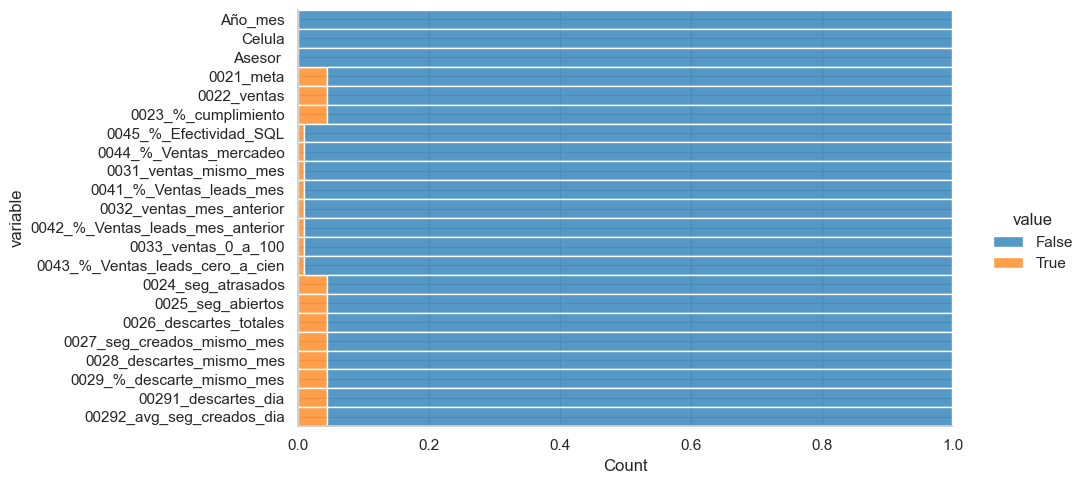

In [ ]:
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
);

podemos observar que la mayoria de datos nulos se encuentran en las columnas que continene seguimientos por lo tanto nos muestra que estos asesores pueden ser bastante efectivos a la hora de vender

## Visualización valores nulos por cada fila

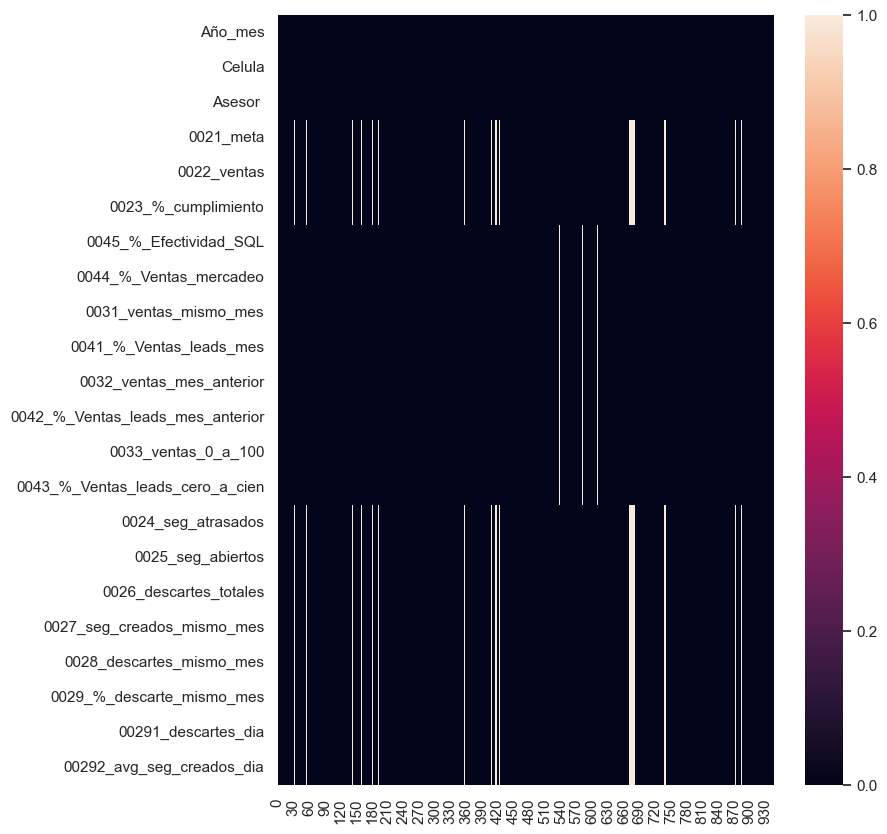

In [ ]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
);

## Descripción de las variables númericas

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Año_mes,946.0,202106.412262,3.519142,202101.0,202103.00,202106.00,202110.00,202112.00
0021_meta,904.0,55.668142,19.136580,10.0,47.00,55.00,77.00,83.00
0022_ventas,904.0,36.411504,15.205092,0.0,26.00,36.00,46.00,100.00
0023_%_cumplimiento,904.0,70.461173,31.562607,0.0,50.60,66.00,84.20,254.50
0045_%_Efectividad_SQL,938.0,20.263326,10.375643,0.0,13.30,19.55,26.40,100.00
0044_%_Ventas_mercadeo,938.0,49.971962,20.485391,0.0,37.50,50.00,63.75,100.00
0031_ventas_mismo_mes,938.0,15.105544,7.919320,0.0,10.00,14.00,19.00,52.00
0041_%_Ventas_leads_mes,938.0,0.415874,0.189818,0.0,0.30,0.41,0.53,1.00
0032_ventas_mes_anterior,938.0,3.191898,2.735485,0.0,1.00,3.00,4.00,25.00
0042_%_Ventas_leads_mes_anterior,938.0,0.084190,0.068338,0.0,0.04,0.07,0.12,0.38


## Descripción de las variables Object

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Celula,946,6,DG3,169
Asesor,946,112,A50,14


## Rango de las variables

In [ ]:
df.max(numeric_only=True) - df.min(numeric_only=True)

Año_mes                              11.00
0021_meta                            73.00
0022_ventas                         100.00
0023_%_cumplimiento                 254.50
0045_%_Efectividad_SQL              100.00
0044_%_Ventas_mercadeo              100.00
0031_ventas_mismo_mes                52.00
0041_%_Ventas_leads_mes               1.00
0032_ventas_mes_anterior             25.00
0042_%_Ventas_leads_mes_anterior      0.38
0033_ventas_0_a_100                  31.00
0043_%_Ventas_leads_cero_a_cien      66.70
0024_seg_atrasados                   78.00
0025_seg_abiertos                   103.00
0026_descartes_totales              271.00
0027_seg_creados_mismo_mes          211.00
0028_descartes_mismo_mes            174.00
0029_%_descarte_mismo_mes            93.90
00291_descartes_dia                  22.00
00292_avg_seg_creados_dia            10.00
dtype: float64

## Ventas en periodo 2021

In [336]:
x = df.groupby(['nombre_mes', 'numero_mes'])['0022_ventas'].sum().reset_index()
x = x.sort_values(by='numero_mes')

<AxesSubplot:xlabel='nombre_mes', ylabel='0022_ventas'>

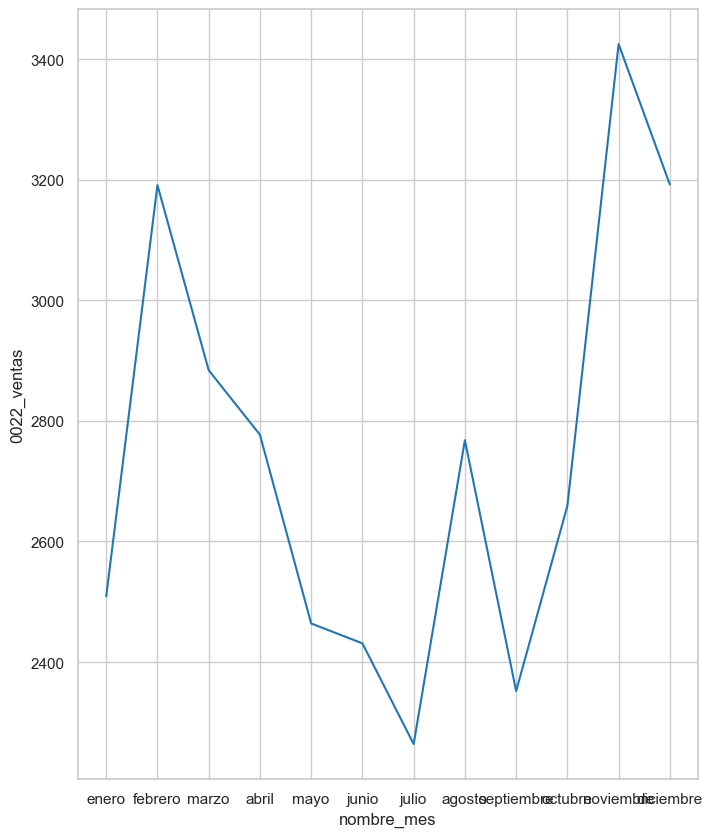

In [337]:
sns.lineplot(
    x=x['nombre_mes'],
    y=x['0022_ventas']
)

## Top 3 meses con mayor ventas

In [338]:
top_3_mes_ventas = df.groupby('nombre_mes')['0022_ventas'].sum().sort_values(ascending=False).reset_index().head(3)
print(top_3_mes_ventas)

  nombre_mes  0022_ventas
0  noviembre       3425.0
1  diciembre       3192.0
2    febrero       3191.0


<AxesSubplot:xlabel='nombre_mes', ylabel='0022_ventas'>

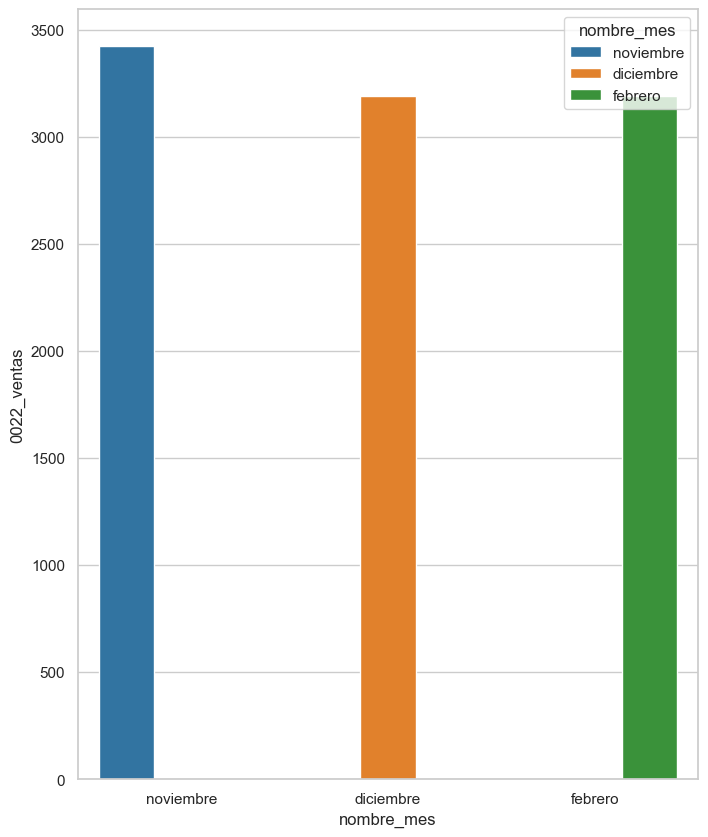

In [339]:
sns.barplot(
    data=top_3_mes_ventas,
    x='nombre_mes',
    y='0022_ventas',
    hue='nombre_mes'
)

## ¿Cuál celula es la que más vende?

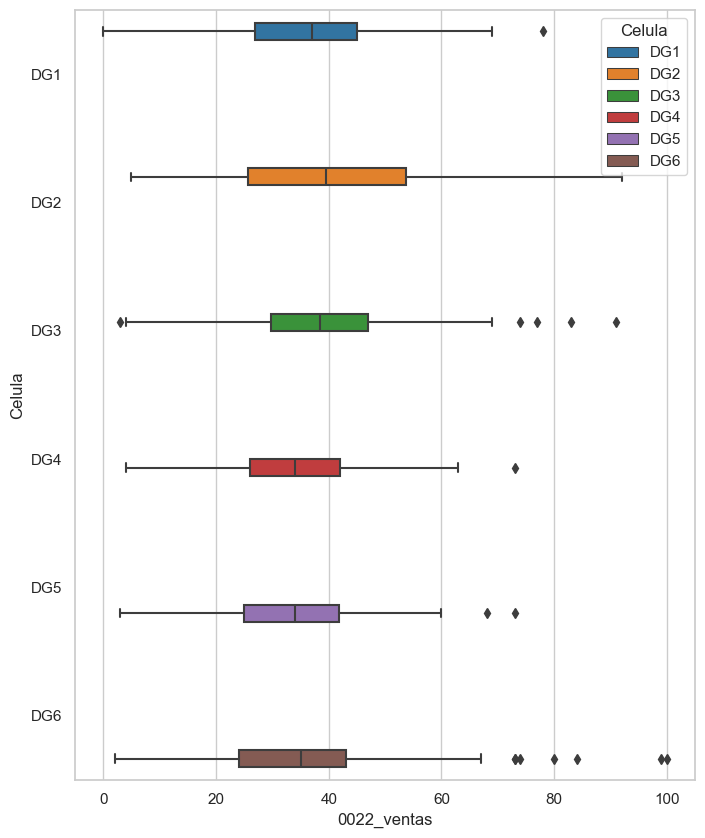

In [ ]:
sns.boxplot(
    data=df,
    x='0022_ventas',
    y='Celula',
    hue='Celula'
);

<AxesSubplot:xlabel='0023_%_cumplimiento', ylabel='Celula'>

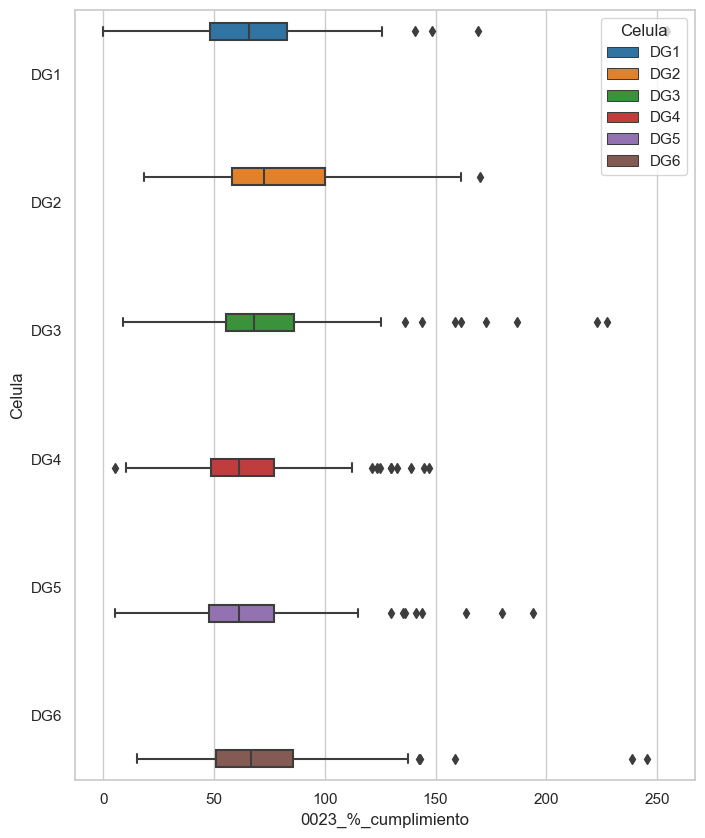

In [ ]:
sns.boxplot(
    data=df,
    x='0023_%_cumplimiento',
    y='Celula',
    hue='Celula'
)

La celula DG2 es la que más vende y la que tiene mayor cumplimiento de cuota.

## Correlaciones de variables

In [ ]:
x = df.corr()
print(x)

                                   Año_mes  0021_meta  0022_ventas  \
Año_mes                           1.000000   0.187748     0.125489   
0021_meta                         0.187748   1.000000     0.487254   
0022_ventas                       0.125489   0.487254     1.000000   
0023_%_cumplimiento               0.059301  -0.466404     0.417449   
0045_%_Efectividad_SQL            0.259914   0.139774     0.401852   
0044_%_Ventas_mercadeo            0.041892  -0.303449    -0.225024   
0031_ventas_mismo_mes             0.076959   0.189485     0.667585   
0041_%_Ventas_leads_mes          -0.008358  -0.370392    -0.238557   
0032_ventas_mes_anterior          0.164239   0.295122     0.487267   
0042_%_Ventas_leads_mes_anterior  0.148114   0.135772     0.007773   
0033_ventas_0_a_100               0.120142   0.157811     0.571416   
0043_%_Ventas_leads_cero_a_cien   0.037246  -0.250691    -0.149840   
0024_seg_atrasados               -0.158067  -0.065166    -0.009264   
0025_seg_abiertos   

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6704\1006886549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = df.corr()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_6704\1712561276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr(),


<AxesSubplot:>

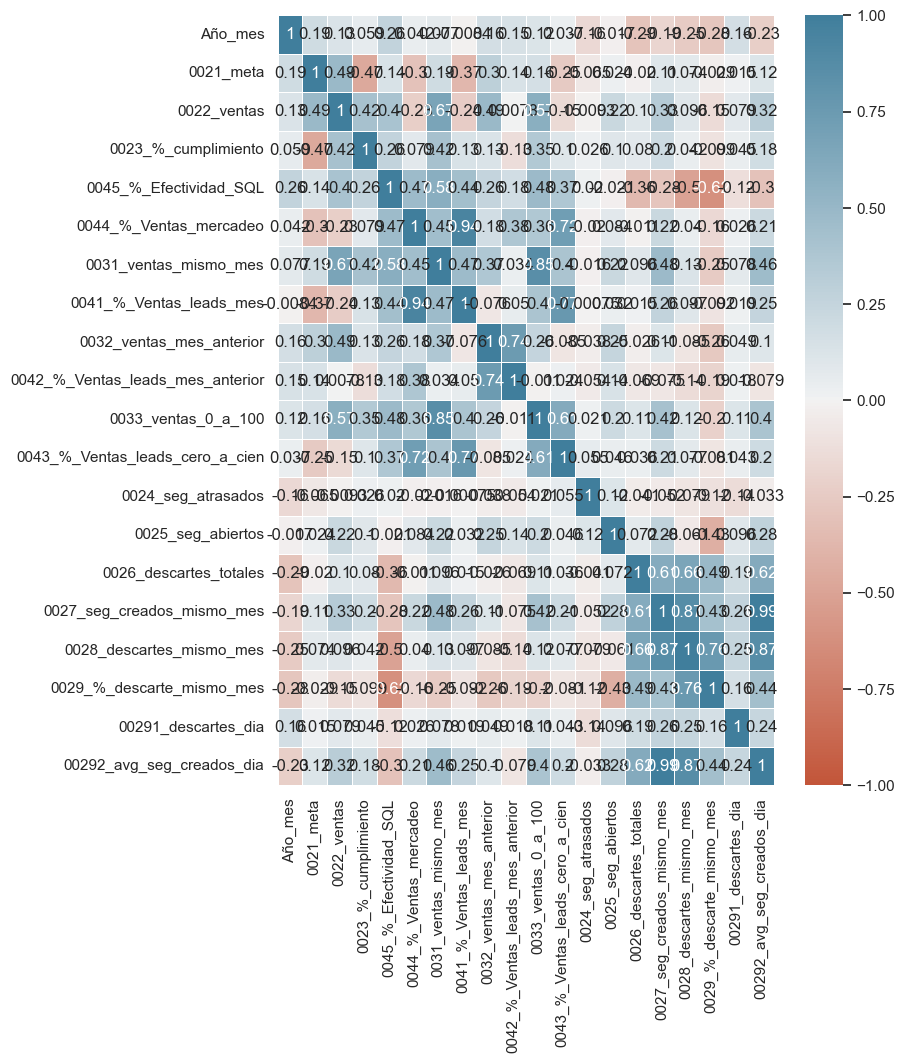

In [ ]:
sns.heatmap(
    data=df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

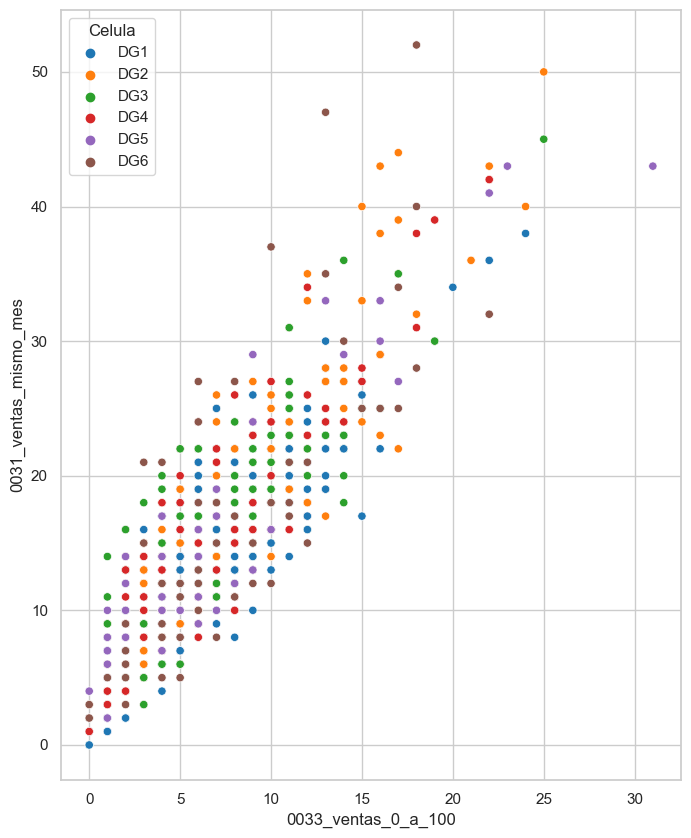

In [ ]:
sns.scatterplot(
    data=df,
    x='0033_ventas_0_a_100',
    y='0031_ventas_mismo_mes',
    hue='Celula'
);

Existe una relación positiva fuerte entre estas dos variables demostrando que los Leads que proporciona el area de mercadeo son muy buenos, impactando de manera positiva las habilidades de cerrar la venta de los asesores